## Welcome to the Antenna Positions tutorial!
In this tutorial you will learn how to create the Antennas geometry.  The central objective of this tutorial is to set up the positions of both source (Tx) and receiver (Rx) antennas within a 3D space. This involves working with an array of antenna positions and subsequently associating them with the survey. For each pair of antennas, precise orientations are required to denote their specific orientations within the 3D space.
### Contents:
1. [Create antenna positions](#1)
2. [Create multiple profiles](#2)
3. [Saving antenna geometry for future use](#3)

In [1]:
# Import all relevant modules
import numpy as np
from fracwave import Antenna
import pyvistaqt as pvqt
import pyvista as pv
pv.set_jupyter_backend('static')

/home/daniel/GitProjects/fracwave/fracwave/geometry/vector_calculus.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


No module named 'osgeo'
2023/11/14 03:21:26 PM | WARNING  | Using Gempy version 2.3.1. Please consider upgrading to Gempy V3.0 or higher to avoid this warning


In [2]:
# Create an instance of the antenna class
ant = Antenna()
print(ant)


        Receiver-Transmitter  2023-11-14 15:21
            nprofiles: 0
            ntraces: 0
            
        


## 1. Create antenna positions <a class="anchor" id="1"></a>
This sections shows how create a set of antenna borehole positions in a single-hole configuration

In [3]:
num_positions = 20
max_depth = 50

depths = np.linspace(10, max_depth, num_positions)
positions = np.zeros((num_positions, 3))
positions[:, 2] = depths

In [4]:
# Assign the positions to the antenna knowing that the transmitter antenna is below the receiver antenna by a separation of 2 meter.
separation = 1.2
Rx = positions
Tx = Rx.copy()
Tx[:, 2] -= separation

As we are dealing with a vertical borehole configuration, the orientation of the antennas remains consistent throughout. We can efficiently create a set of orientations for each antenna position in vector form, represented as (nx, ny, nz), and normalize them to a magnitude of 1.

In [5]:
orientations = np.zeros((num_positions, 3))
orientations[:, -1] = 1

Now we can assign the positions and orientations to the antenna

In [6]:
ant.set_profile(name_profile='single-hole',
                receivers=Rx,
                transmitters=Tx,
                orient_transmitters=orientations,
                orient_receivers=orientations,
                # Depths are optional and is only for reference of the borehole depth when you want to specify borehole depths. Any vector of the same length as the number of positions can be used.
                depth_Rx= None,
                depth_Tx= None,
                overwrite=True)
print(ant)

2023/11/14 03:21:38 PM | DEBUG    | Rx set
2023/11/14 03:21:38 PM | DEBUG    | Tx set
2023/11/14 03:21:38 PM | DEBUG    | orient_Rx set
2023/11/14 03:21:38 PM | DEBUG    | orient_Tx set

        Receiver-Transmitter  2023-11-14 15:21
            nprofiles: 1
            ntraces: 20
            
        


We can plot the antenna positions and orientations using  matplotlib ('mpl') or PyVista ('pyvista').

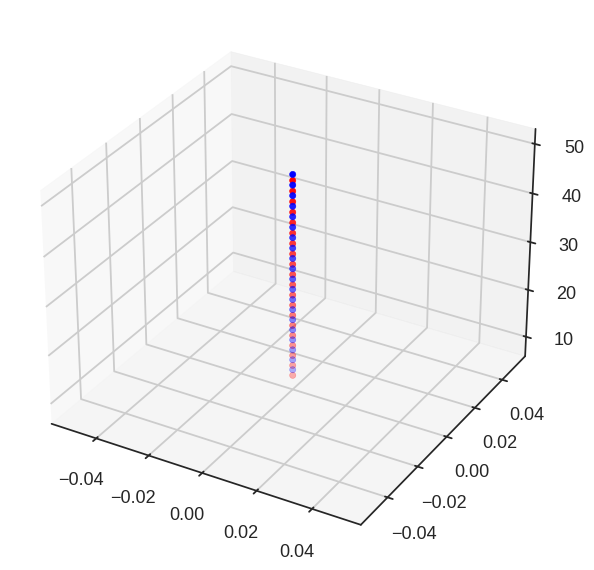

<Axes3D: >

In [7]:
ant.plot(backend='mpl', show=True)  # Set 'pyvista' as the backend to use the interactive window

We can quickly asses the orientation of the antenna by plotting the orientation vectors. They all should be pointing upwards

In [8]:
ant.plot(backend='pyvista',
         arrows=True,  # Careful, when too many arrows it may crash)
         )

## 2. Create multiple profiles <a class="anchor" id="2"></a>
Expanding further on our antenna capabilities, we have the flexibility to load and manage multiple profiles within the same antenna object.
This powerful feature allows us to seamlessly handle diverse profiles, enabling us to analyze and compare various configurations efficiently. By incorporating multiple profiles into a single antenna object, we optimize data organization and accessibility, streamlining the analysis process.

In [9]:
num_positions = 20
max_depth = 50
separation = 1.2

orientation_borehole = np.asarray([0.1 ,0.1 , 1])
orientation_borehole = orientation_borehole / np.linalg.norm(orientation_borehole)

depths_rx = np.linspace(0, max_depth, num_positions)
positions_rx = np.zeros((num_positions, 3))
positions_rx[:, 2] = depths_rx
# Calculate X and Y coordinates based on the direction vector
positions_rx[:, 0] = orientation_borehole[0] * depths_rx
positions_rx[:, 1] = orientation_borehole[1] * depths_rx


positions_tx = positions_rx.copy()
positions_tx = positions_tx + orientation_borehole * separation



In [10]:
ant.set_profile(name_profile='single-hole-2',
                receivers=positions_rx,
                transmitters=positions_tx,
                orient_transmitters=np.tile(orientation_borehole, (num_positions,1)),
                orient_receivers=np.tile(orientation_borehole, (num_positions,1)),
                # Depths are optional and is only for reference of the borehole depth when you want to specify borehole depths. Any vector of the same length as the number of positions can be used.
                depth_Rx= None,
                depth_Tx= None,
                overwrite=True)
print(ant)  # Notice that now we have 2 profiles

2023/11/14 03:21:45  | DEBUG    | Rx set
2023/11/14 03:21:45  | DEBUG    | Tx set
2023/11/14 03:21:45  | DEBUG    | orient_Rx set
2023/11/14 03:21:45  | DEBUG    | orient_Tx set

        Receiver-Transmitter  2023-11-14 15:21
            nprofiles: 2
            ntraces: 40
            
        


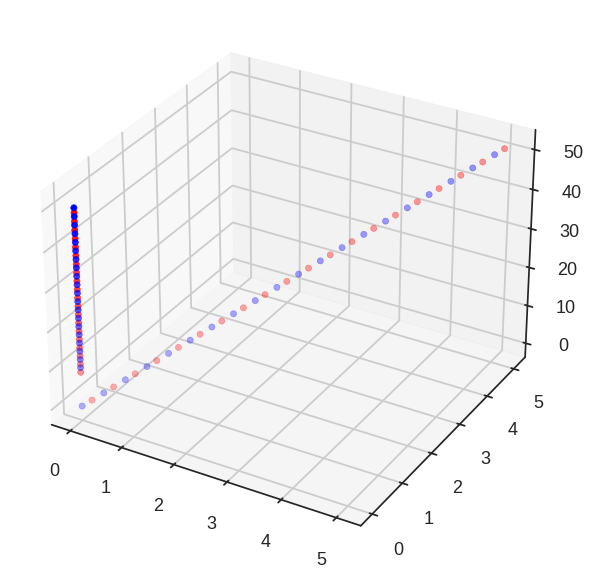

<Axes3D: >

In [11]:
ant.plot(backend='mpl')

In [12]:
ant.plot(backend='pyvista',
         arrows=True,  # Carefull, when too many arrows it may crash)
         )

All the data is stored in a DataFrame

In [13]:
df = ant.profiles
print(df.head())

    Rx   Ry         Rz   Tx   Ty         Tz  orient_Rx  orient_Ry  orient_Rz   
0  0.0  0.0  10.000000  0.0  0.0   8.800000        0.0        0.0        1.0  \
1  0.0  0.0  12.105263  0.0  0.0  10.905263        0.0        0.0        1.0   
2  0.0  0.0  14.210526  0.0  0.0  13.010526        0.0        0.0        1.0   
3  0.0  0.0  16.315789  0.0  0.0  15.115789        0.0        0.0        1.0   
4  0.0  0.0  18.421053  0.0  0.0  17.221053        0.0        0.0        1.0   

   orient_Tx  orient_Ty  orient_Tz      profile index  
0        0.0        0.0        1.0  single-hole     0  
1        0.0        0.0        1.0  single-hole     1  
2        0.0        0.0        1.0  single-hole     2  
3        0.0        0.0        1.0  single-hole     3  
4        0.0        0.0        1.0  single-hole     4  


In [14]:
# Here if you want to know how to plot all the profiles in the same figure using pyvista
plotter = pvqt.BackgroundPlotter()
plotter.show_bounds()
plotter.show_axes()

sources = pv.PolyData(ant.Transmitter)
plotter.add_mesh(sources, color='red')
receivers = pv.PolyData(ant.Receiver)
plotter.add_mesh(receivers, color='blue')

Tx_arrows = pv.PolyData()
for i in range(len(ant.orient_Transmitter)):
    Tx_arrows += pv.Arrow(start=ant.Transmitter[i], direction=ant.orient_Transmitter[i])
plotter.add_mesh(Tx_arrows, color='red')
Rx_arrows = pv.PolyData()
for i in range(len(ant.orient_Receiver)):
    Rx_arrows += pv.Arrow(start=ant.Receiver[i], direction=ant.orient_Receiver[i])
plotter.add_mesh(Rx_arrows, color='blue')
plotter.show()

If you don't want to create all of these yourself, you can easily use a predefined function for that:

In [15]:
Tx_p, Rx_p, Tx_arrows_p, Rx_arrows_p = ant.get_geometry(show=False)  # If show true then it will plot it

In [16]:
plotter = pvqt.BackgroundPlotter()
plotter.show_bounds()
plotter.show_axes()
plotter.add_mesh(Rx_p, color='blue')
plotter.add_mesh(Rx_arrows_p, color='blue')
plotter.add_mesh(Tx_p, color='red')
plotter.add_mesh(Tx_arrows_p, color='red')
plotter.show()

# 3. Saving antenna geometry for future use <a class="anchor" id="3"></a>
As we did previously, we rely on the efficiency and convenience of h5py to save the antenna geometry for future use.

In [17]:
from fracwave import OUTPUT_DIR
ant.export_to_hdf5(filename=OUTPUT_DIR + 'frac1.h5', overwrite=True) # Ideally we will use the same filename for all the data we are creating

2023/11/14 03:22:05  | INFO     | Overwriting existing "antenna" information
2023/11/14 03:22:05  | INFO     | File successfully saved in: /home/daniel/GitProjects/fracwave/output/frac1.h5


In [18]:
# We can load the geometry using the same filename
ant2 = Antenna()
ant2.load_hdf5(OUTPUT_DIR + 'frac1.h5')

2023/11/14 03:22:06  | DEBUG    | Rx set
2023/11/14 03:22:06  | DEBUG    | Tx set
2023/11/14 03:22:06  | DEBUG    | orient_Rx set
2023/11/14 03:22:06  | DEBUG    | orient_Tx set
2023/11/14 03:22:06  | DEBUG    | Rx set
2023/11/14 03:22:06  | DEBUG    | Tx set
2023/11/14 03:22:06  | DEBUG    | orient_Rx set
2023/11/14 03:22:06  | DEBUG    | orient_Tx set
2023/11/14 03:22:06  | INFO     | Loaded successfully


In [19]:
p = ant.plot(backend='pyvista',
         arrows=True,
         )